In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
%matplotlib inline

In [3]:
def show_graph(X, Y, Z):
    plt.figure(figsize=(12, 4))
    ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='coolwarm')
    ax2 = plt.subplot2grid((1, 3), (0, 2))
    ax2.pcolormesh(X, Y, Z, cmap='coolwarm')
    plt.show()

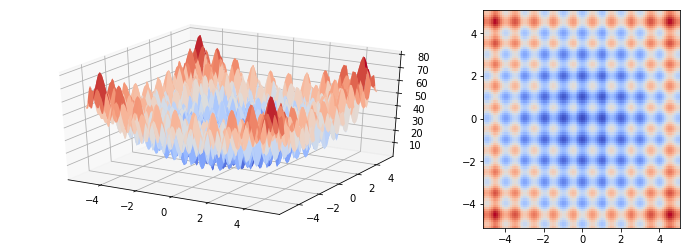

In [4]:
def rastrigin(x, y, A=10):
    return 2*A + (x**2 - 10*np.cos(2*np.pi*x)) + (y**2 - 10*np.cos(2*np.pi*y))

x = y = np.arange(-5.12, 5.12, 0.1)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

show_graph(X, Y, Z)

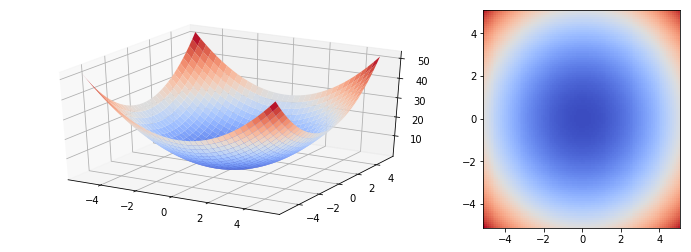

In [5]:
def sphere(x, y):
    return x**2 + y**2

x = y = np.arange(-5.12, 5.12, 0.1)
X, Y = np.meshgrid(x, y)
Z = sphere(X, Y)

show_graph(X, Y, Z)

time:  1	 best pos.:[0.1485, -0.3094] 	 best score:17.8118
time: 10	 best pos.:[-0.0798, 1.0369] 	 best score:2.5798
time: 20	 best pos.:[0.0200, 0.0117] 	 best score:0.1062
time: 30	 best pos.:[-0.0085, 0.0053] 	 best score:0.0198
time: 40	 best pos.:[-0.0038, -0.0004] 	 best score:0.0028
time: 50	 best pos.:[-0.0016, 0.0021] 	 best score:0.0014
time: 60	 best pos.:[-0.0001, -0.0008] 	 best score:0.0001
time: 70	 best pos.:[0.0001, -0.0002] 	 best score:0.0000
time: 80	 best pos.:[-0.0000, 0.0000] 	 best score:0.0000
time: 90	 best pos.:[-0.0000, -0.0000] 	 best score:0.0000
time:100	 best pos.:[-0.0000, -0.0000] 	 best score:0.0000


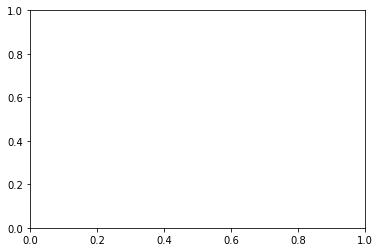

In [7]:
N = 20
T = 100
w = 0.99
f = rastrigin

def get_particle():
    x = np.random.uniform(-5.12, 5.12, 2)
    v = np.zeros(2)
    s = f(*x)
    p = x
    return {'x': x, 'v': v, 's': s, 'p':p}

def save_img(i, particles):
    plt.cla()
    X, Y = np.meshgrid(np.arange(-5.12, 5.12, 0.1), np.arange(-5.12, 5.12, 0.1))
    Z = f(X, Y)
    
    fig = plt.figure(figsize=(8,8))
    d = np.array([p['x'] for p in particles])
    plt.xlim(-5.12, 5.12)
    plt.ylim(-5.12, 5.12)
    plt.contour(X, Y, Z, cmap='coolwarm')
    plt.scatter(*d.T, c='orange', marker='x')
    plt.savefig('results/PSO/PSO_{i}.png'.format(i=i))
    plt.close()

    
# init
particles = [get_particle() for _ in range(N)]
pg = particles[0]['x']
sg = particles[0]['s']

for p in particles:
    if p['s'] < sg:
        pg = p['x']
        sg = p['s']

save_img(0, particles)

for t in range(1,T+1):
    for p in particles:
        cr1, cr2 = np.random.rand(2)
        cr1 *= 0.9
        cr2 *= 0.1
        v_new = w * p['v'] + cr1 * (p['p'] - p['x']) + cr2 * (pg - p['x'])
        x_new = p['x'] + v_new
        p['x'] = x_new
        p['v'] = v_new
        s_new = f(*x_new)
        if s_new < p['s']:
            p['p'] = x_new
        p['s'] = s_new

    for p in particles:
        if p['s'] < sg:
            pg = p['x']
            sg = p['s']
    if t % 10 == 0 or t == 1:
        print("time:{t:>3}\t best pos.:[{p1:.4f}, {p2:.4f}] \t best score:{s:.4f}".format(
            t=t, p1=pg[0], p2=pg[1], s=float(sg)))
    save_img(t, particles)